In [192]:
%matplotlib inline

# Nutrition and Fitness Correlation Analysis

In [193]:
# First step is to import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

In [194]:
# After that loading the dataset
daily_performance_dataset = pd.read_csv('data/Daily_performance_data.csv')

In [195]:
# Then I will familiarizate with dataset also I am going to perform data tidying and data cleaning if it is necessary.
# Getting general information about the dataset
daily_performance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  341 non-null    object 
 1   Weight                332 non-null    float64
 2   scriptedIntensity     341 non-null    object 
 3   RPE                   292 non-null    float64
 4   Strain                326 non-null    float64
 5   maxHR                 318 non-null    float64
 6   averageHR             318 non-null    float64
 7   kCal_Out              307 non-null    float64
 8   kCal_In               248 non-null    float64
 9   Protein               246 non-null    float64
 10  Carbs                 247 non-null    float64
 11  Fats                  245 non-null    float64
 12  saturatedFat          246 non-null    float64
 13  Cholesterol           246 non-null    float64
 14  Sodium                245 non-null    float64
 15  Potassium             2

In [196]:
# To check how many rows and columns the dataset has, i will use this command:
daily_performance_dataset.shape

(347, 45)

In [197]:
# as we see it has 347 rows and 45 columns.
# Now I want to see what are the names of the columns
daily_performance_dataset.columns

Index(['Date', 'Weight', 'scriptedIntensity', 'RPE', 'Strain', 'maxHR',
       'averageHR', 'kCal_Out', 'kCal_In', 'Protein', 'Carbs', 'Fats',
       'saturatedFat', 'Cholesterol', 'Sodium', 'Potassium', 'Sugar',
       'Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron', 'Creatine', 'Fish Oil',
       'Vitamin_D', '135ozWater', 'totalSleep', 'sleepOnset', 'sleepEnd',
       'In_bed_duration', 'Light_sleep_duration', 'Deep_SWS_duration',
       'REM_Duration', 'awakeDuration', 'HRV', 'restingHR', 'respitoryRate',
       'iceTub', 'redLight', 'Speed', 'Strength', 'Mental', 'Soreness',
       'Overall', 'Notes', 'Alcohol'],
      dtype='object')

In [198]:
# I want to see how dataset looks like but not whole, only first 2 rows. I make this to get some basic image of the dataset.
daily_performance_dataset.head(2)

,Date,Weight,scriptedIntensity,RPE,Strain,maxHR,averageHR,kCal_Out,kCal_In,Protein,...,respitoryRate,iceTub,redLight,Speed,Strength,Mental,Soreness,Overall,Notes,Alcohol
0,"Tuesday, March 1, 2022",227.0,Medium,6.0,9.4,173.0,132.0,2389.0,3819.8,285.7,...,13.5,True,True,8.0,9.0,10.0,2.0,8.0,NaN,False
1,"Wednesday, March 2, 2022",228.0,Light,5.0,7.2,156.0,128.0,2420.0,2849.6,223.0,...,13.4,True,False,7.0,9.0,8.0,4.0,7.0,NaN,False


In [199]:
# Check if the dataset has some null or missing values
daily_performance_dataset.isna().sum()

Date                      6
Weight                   15
scriptedIntensity         6
RPE                      55
Strain                   21
maxHR                    29
averageHR                29
kCal_Out                 40
kCal_In                  99
Protein                 101
Carbs                   100
Fats                    102
saturatedFat            101
Cholesterol             101
Sodium                  102
Potassium               104
Sugar                   104
Vitamin_A               104
Vitamin_C               105
Calcium                 107
Iron                    108
Creatine                  6
Fish Oil                  6
Vitamin_D                 6
135ozWater                6
totalSleep               65
sleepOnset               66
sleepEnd                 66
In_bed_duration          66
Light_sleep_duration     66
Deep_SWS_duration        66
REM_Duration             66
awakeDuration            68
HRV                      54
restingHR                52
respitoryRate       

In [200]:
# as we see there is a lot of missing values. I can't simple drop null values,
# because it is a lot and i will lost a lot of information with this action.
# Now i want to check type of the columns. That will help me to take decision how to fill this missing information.
daily_performance_dataset.dtypes

Date                     object
Weight                  float64
scriptedIntensity        object
RPE                     float64
Strain                  float64
maxHR                   float64
averageHR               float64
kCal_Out                float64
kCal_In                 float64
Protein                 float64
Carbs                   float64
Fats                    float64
saturatedFat            float64
Cholesterol             float64
Sodium                  float64
Potassium               float64
Sugar                   float64
Vitamin_A               float64
Vitamin_C               float64
Calcium                 float64
Iron                    float64
Creatine                 object
Fish Oil                 object
Vitamin_D                object
135ozWater               object
totalSleep              float64
sleepOnset               object
sleepEnd                 object
In_bed_duration         float64
Light_sleep_duration    float64
Deep_SWS_duration       float64
REM_Dura

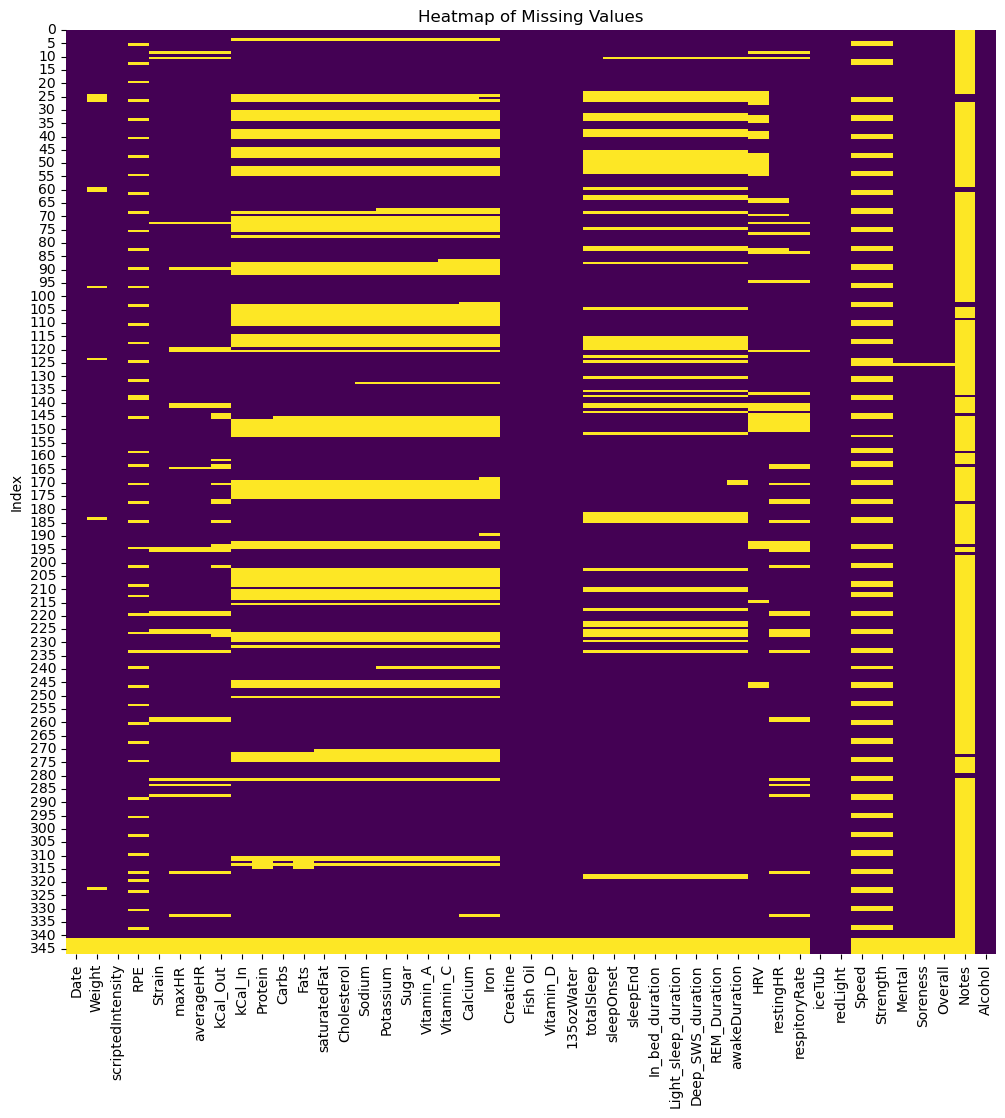

In [201]:
# plot a null values in heatmap to see where are they.
plt.figure(figsize=(12,12))
sns.heatmap(daily_performance_dataset.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.yticks(np.arange(0, len(daily_performance_dataset), 5), labels=daily_performance_dataset.index[::5])
plt.ylabel("Index")
plt.show()

In [202]:
# As we see from heatmap last 6 rows has Nan in almost every column.
daily_performance_dataset[daily_performance_dataset['Date'].isna() == True]

,Date,Weight,scriptedIntensity,RPE,Strain,maxHR,averageHR,kCal_Out,kCal_In,Protein,...,respitoryRate,iceTub,redLight,Speed,Strength,Mental,Soreness,Overall,Notes,Alcohol
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,True,False,NaN,NaN,NaN,NaN,NaN,NaN,False
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False
346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,False


In [203]:
# That's why I am going to drop them.
daily_performance_dataset=daily_performance_dataset[~(daily_performance_dataset['Date'].isna())]

In [204]:
# Now I am going to transform Date from object field to datetime and i will put it like index.
# First I make a new column Weekday
daily_performance_dataset.loc[:, 'Weekday'] = pd.to_datetime(daily_performance_dataset['Date'], format="%A, %B %d, %Y").dt.day_name()

In [205]:
# Arrange the columns to start with "Date" and "Weekday", after that will be rest of them.
daily_performance_dataset = daily_performance_dataset[['Date', 'Weekday']+ [col for col in daily_performance_dataset.columns if col not in ["Date", "Weekday"]]]
daily_performance_dataset.head(2)

,Date,Weekday,Weight,scriptedIntensity,RPE,Strain,maxHR,averageHR,kCal_Out,kCal_In,...,respitoryRate,iceTub,redLight,Speed,Strength,Mental,Soreness,Overall,Notes,Alcohol
0,"Tuesday, March 1, 2022",Tuesday,227.0,Medium,6.0,9.4,173.0,132.0,2389.0,3819.8,...,13.5,True,True,8.0,9.0,10.0,2.0,8.0,NaN,False
1,"Wednesday, March 2, 2022",Wednesday,228.0,Light,5.0,7.2,156.0,128.0,2420.0,2849.6,...,13.4,True,False,7.0,9.0,8.0,4.0,7.0,NaN,False


In [206]:
# Transform "Date" in datetime
daily_performance_dataset.Date = pd.to_datetime(daily_performance_dataset.Date, format="%A, %B %d, %Y")
# daily_performance_dataset.Date = pd.to_datetime(daily_performance_dataset.Date)

In [207]:
daily_performance_dataset['Date']

0     2022-03-01
1     2022-03-02
2     2022-03-03
3     2022-03-04
4     2022-03-05
         ...    
336   2023-06-10
337   2023-06-11
338   2023-06-12
339   2023-06-13
340   2023-06-14
Name: Date, Length: 341, dtype: datetime64[ns]

In [210]:
# set 'Date' for index
daily_performance_dataset.set_index('Date', inplace=True)

In [211]:
daily_performance_dataset.index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12',
               '2023-06-13', '2023-06-14'],
              dtype='datetime64[ns]', name='Date', length=341, freq=None)

In [212]:
# Let's continue to deal with missing information in another column
daily_performance_dataset['Weight'][daily_performance_dataset['Weight'].isna()]

Date
2022-03-25   NaN
2022-03-26   NaN
2022-03-27   NaN
2022-04-29   NaN
2022-04-30   NaN
2022-06-05   NaN
2022-07-02   NaN
2022-12-17   NaN
2023-05-27   NaN
Name: Weight, dtype: float64

In [213]:
# Rows where missing information for 'Weight' occurs are distinct and not consecutive.
# Therefore, I chose to use interpolation to fill these gaps,
# assuming that subsequent data points will provide a more accurate estimate for the missing values.

daily_performance_dataset.Weight = daily_performance_dataset.Weight.interpolate(method='linear')

In [214]:
# check if everything is Ok
daily_performance_dataset['Weight'].isna().sum()

0

In [215]:
# extract every numeric type columns into variable
numeric_columns = daily_performance_dataset.select_dtypes(['int', 'float'])

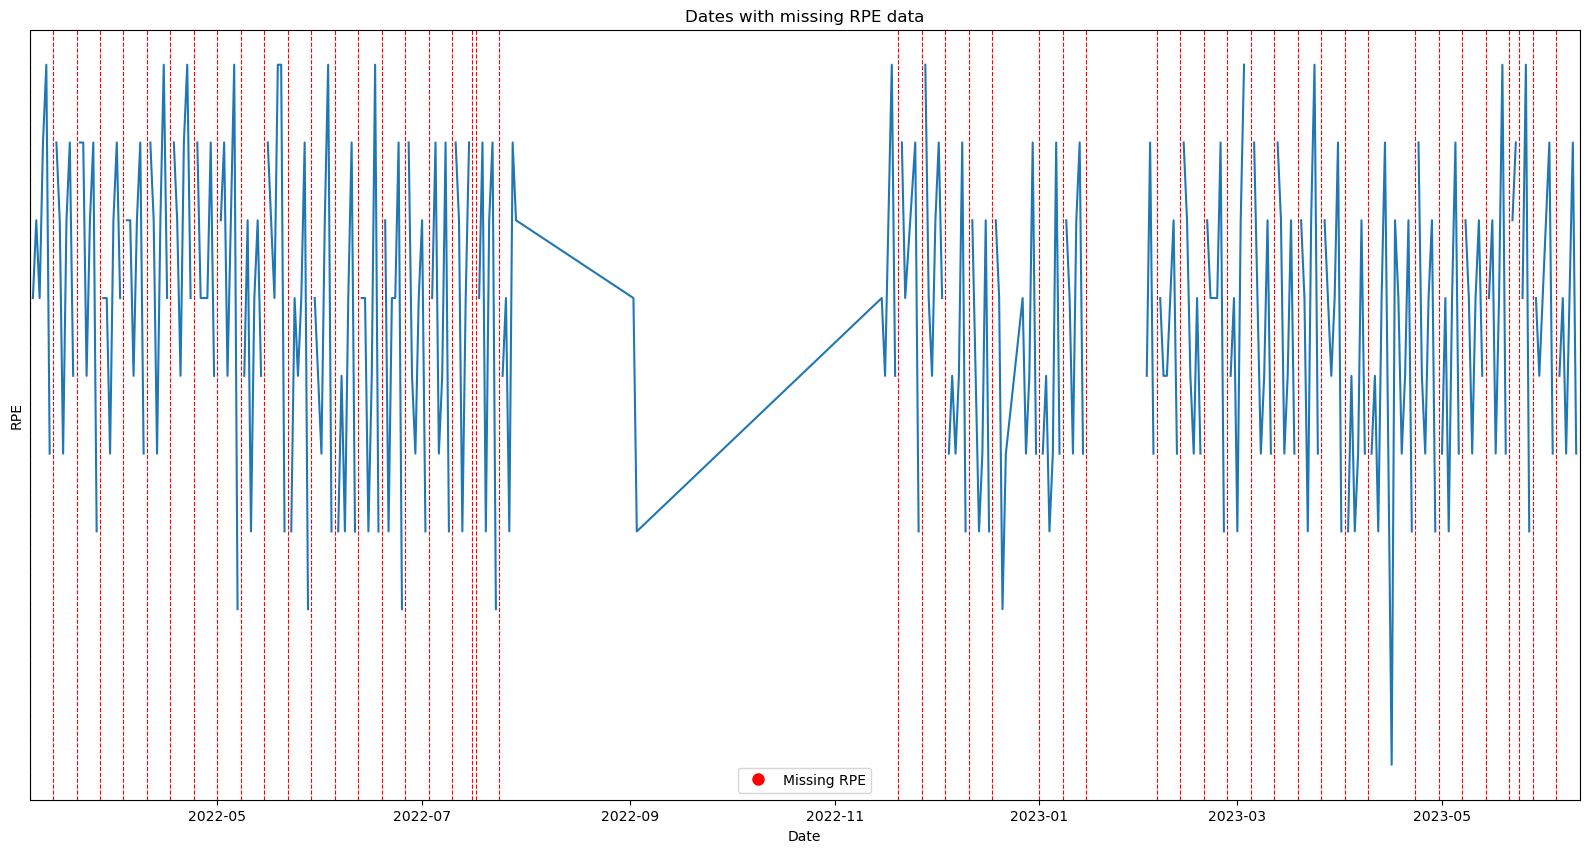

In [216]:
# creating plot for RPE data and visualize the NaN values
rpe_nan = daily_performance_dataset[daily_performance_dataset['RPE'].isna()]

plt.figure(figsize=(20,10))
plt.plot(daily_performance_dataset['RPE'])
plt.plot(rpe_nan.index, rpe_nan['RPE'], 'ro', markersize=8, label='Missing RPE')

for date in rpe_nan.index:
    plt.axvline(x=date, color='red', linestyle='dashed', linewidth=0.8)
    
plt.xlim(rpe_nan.index.min(), rpe_nan.index.max())
plt.yticks([])

plt.xlabel('Date')
plt.ylabel('RPE')

plt.title("Dates with missing RPE data")
plt.legend()
plt.show()

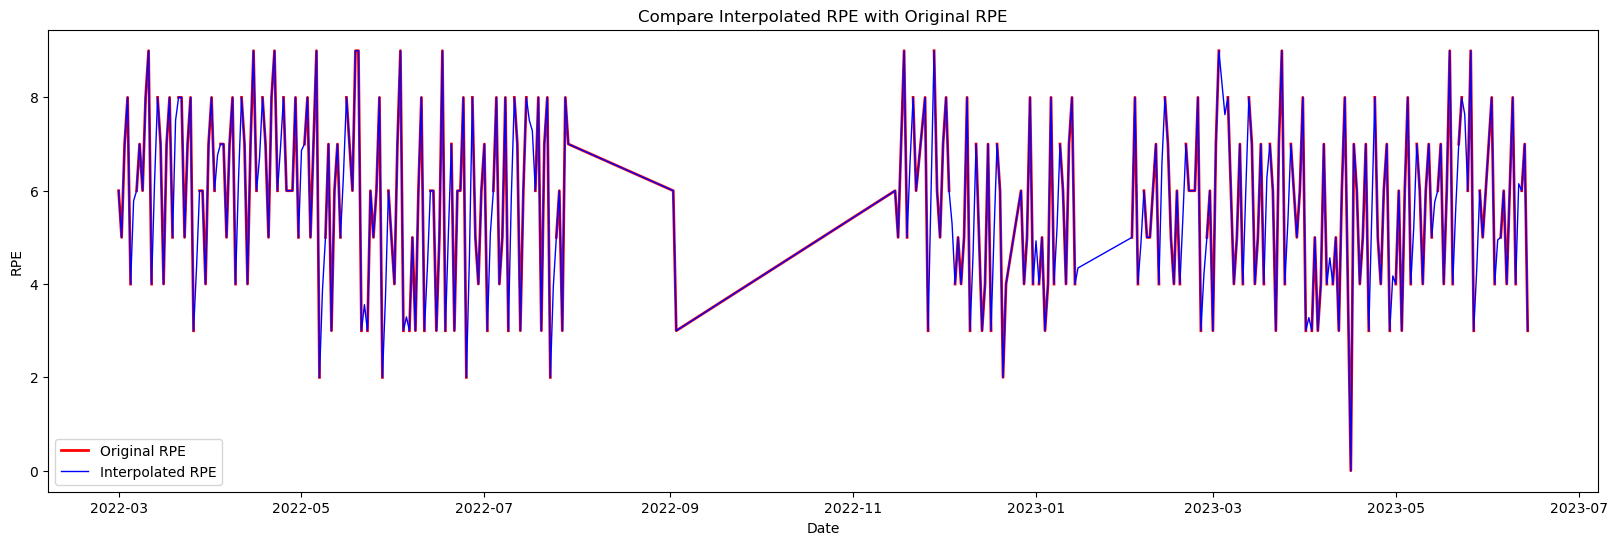

In [233]:
# For filling missing data i would use spline interpolation because this method can capture more of the underlying trend in the data.
plt.figure(figsize=(20,6))
daily_performance_dataset['RPE'].interpolate(method='spline', order=2)
plt.plot(daily_performance_dataset['RPE'], label='Original RPE', color='r',linewidth=2)
plt.plot(daily_performance_dataset['RPE'].interpolate(method='spline', order=1), label= "Interpolated RPE", color='b', linewidth=1)

plt.title("Compare Interpolated RPE with Original RPE")
plt.xlabel('Date')
plt.ylabel('RPE')
plt.legend()
plt.show()

In [237]:
# As it is seen from the figure this interpolation keeps trend of the RPE.
# Save Interpolated RPE as RPE
daily_performance_dataset['RPE'] = daily_performance_dataset['RPE'].interpolate(method='spline', order=1)

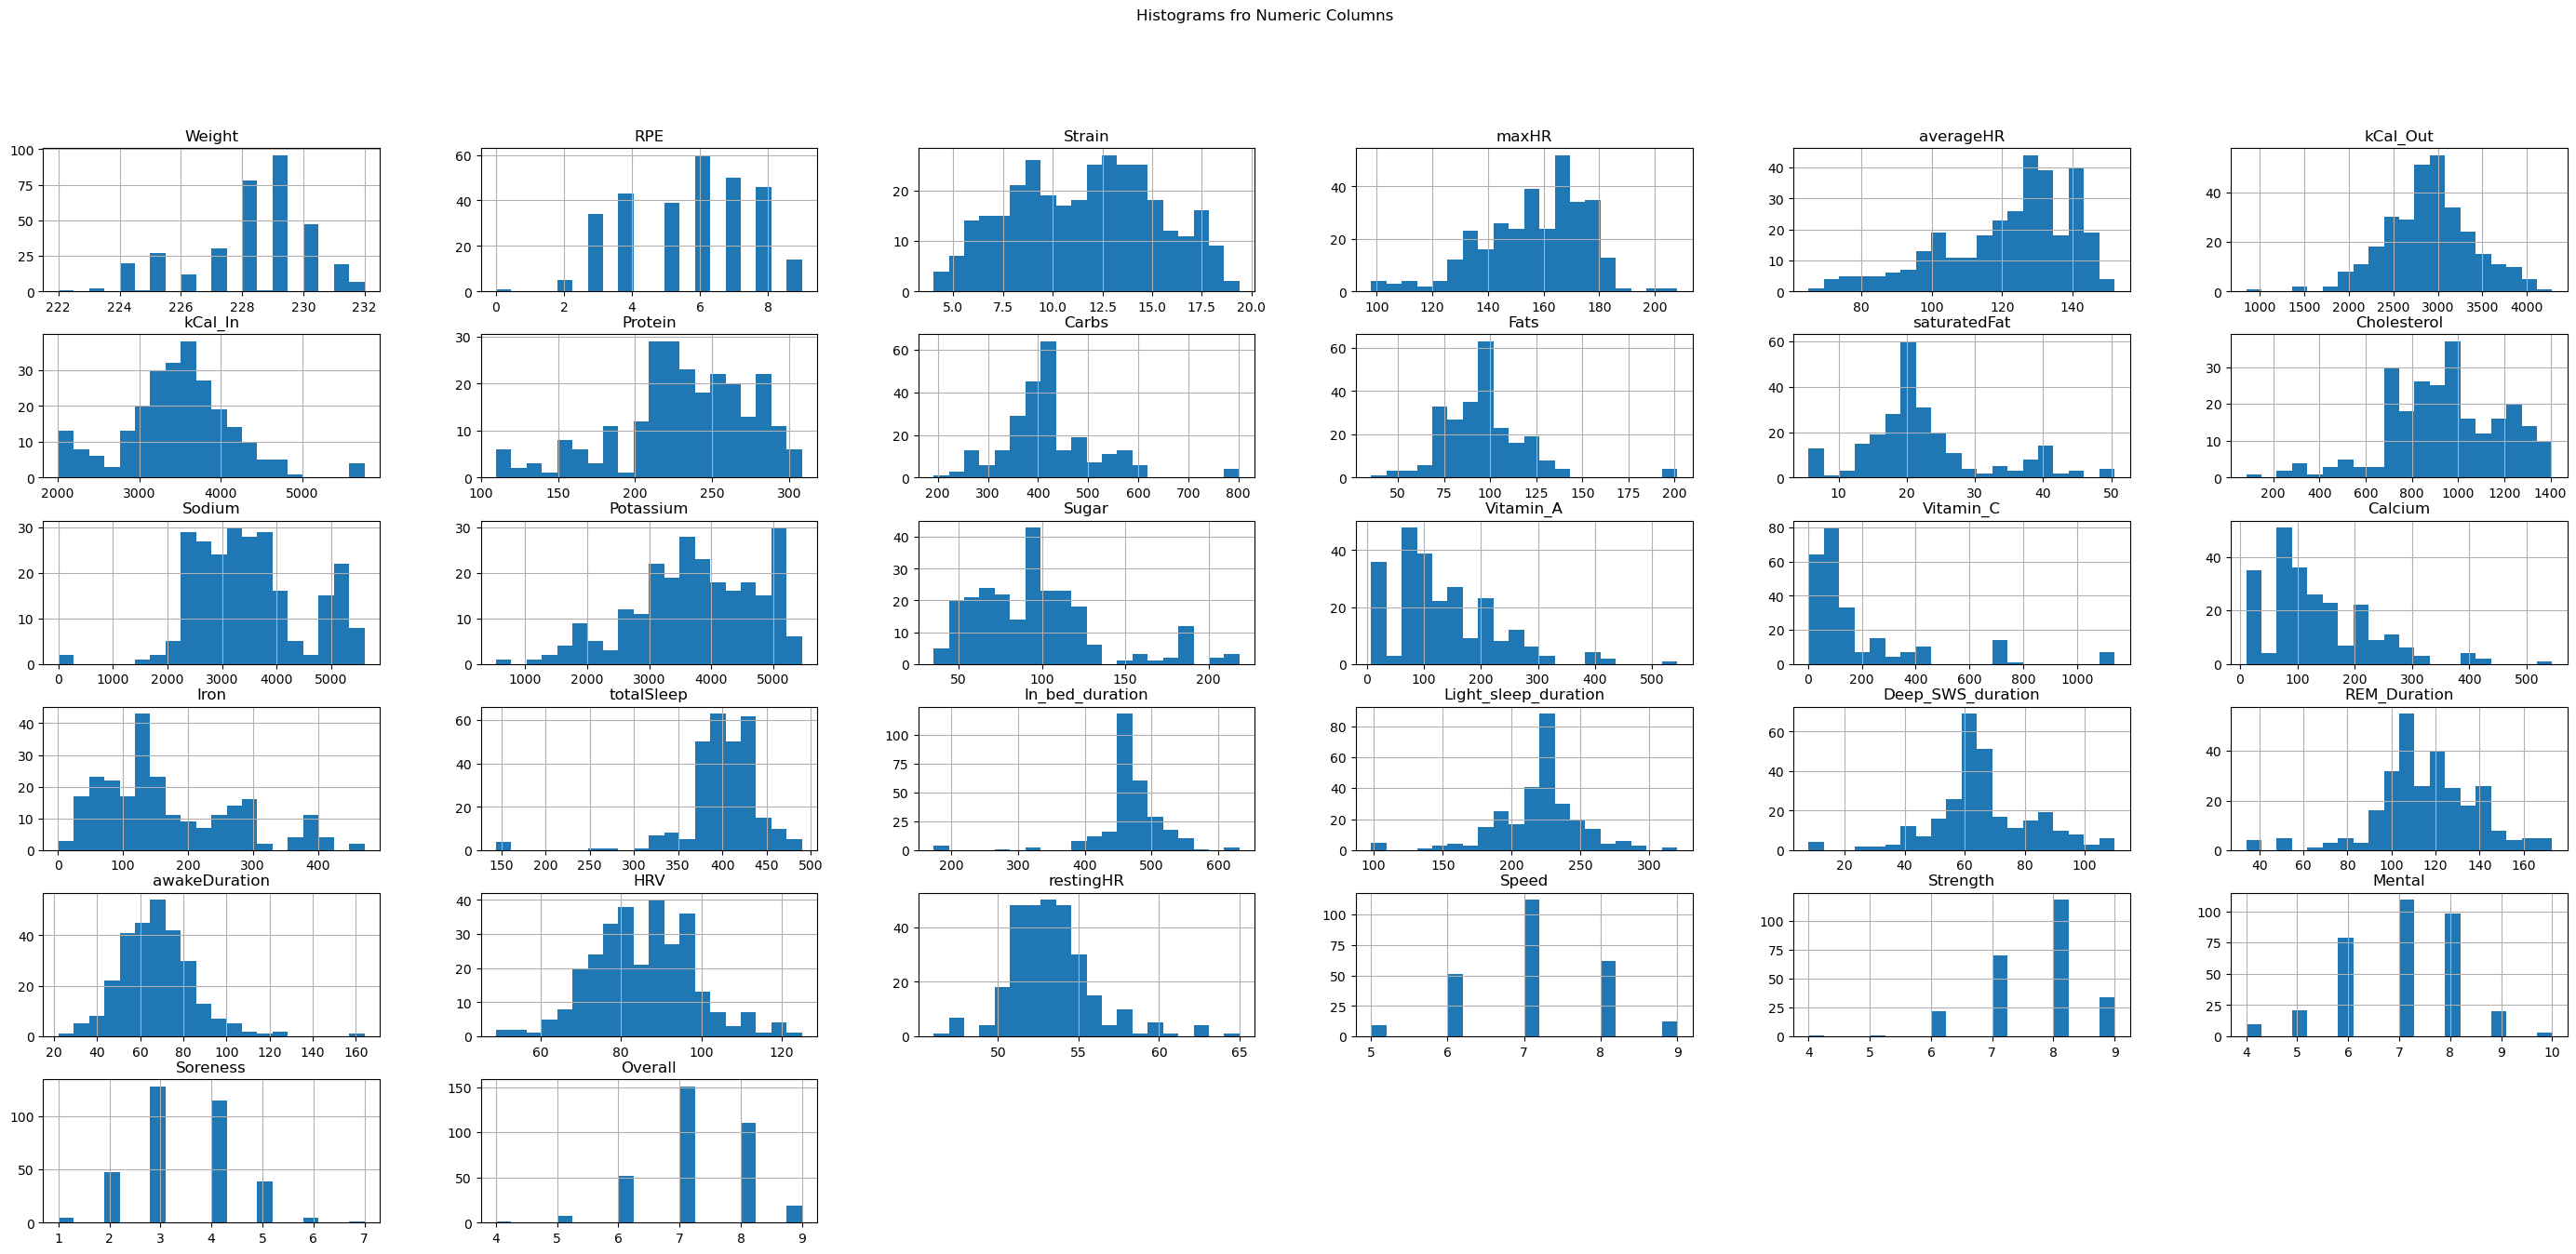

In [238]:
numeric_columns.hist(figsize=(35,15), bins=20)
plt.suptitle('Histograms fro Numeric Columns')
plt.show()